In [1]:
import pandas as pd

sel= pd.read_excel('./샘플링데이터위도경도표시.xlsx')
sel

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
0,20384,일식,아라키,0.0,0,0,서울 중구 을지로5길 19,37.566921,126.983964,02-6353-8578,NaN,https://place.map.kakao.com/865059627#review
1,7924,"족발,보쌈",위대한족보,3.8,5,20,서울 중랑구 답십리로77길 11 1층,37.572089,127.081440,02-438-8008,"월,수,목,금,토,일 14:00 ~ 00:00",https://place.map.kakao.com/99546281#review
2,16890,국수,마루칼국수,4.7,3,1,서울 용산구 두텁바위로1길 42,37.546123,126.974486,02-3789-2630,NaN,https://place.map.kakao.com/248675031#review
3,15547,한식,먹쇠집,4.8,4,3,서울 종로구 종로 297-3,37.571978,127.010776,02-741-1426,NaN,https://place.map.kakao.com/9763716#review
4,5772,카페,카페더로비,3.9,10,34,서울 도봉구 방학로 171-5,37.661988,127.033254,02-954-1715,화~일 11:00 ~ 23:00,https://place.map.kakao.com/447862448#review
...,...,...,...,...,...,...,...,...,...,...,...,...
891,7002,냉면,혜화면옥,3.1,18,25,서울 성북구 보문로 193-1,37.590818,127.013917,02-921-3451,매일 11:00 ~ 22:00,https://place.map.kakao.com/26481780#review
892,2610,"돈까스,우동",신온누리에 생돈까스전문점 대방점,1.7,56,85,서울 동작구 여의대방로24길 107,37.499147,126.925928,02-823-8589,매일 10:30 ~ 21:00,https://place.map.kakao.com/11832450#review
893,21111,양식,파스타미샤,0.0,0,0,서울 종로구 창덕궁길 59,37.580135,126.989144,NaN,NaN,https://place.map.kakao.com/1469768429#review
894,5339,"호프,요리주점",지금보고싶다,3.0,2,38,서울 관악구 남현3길 74,37.475305,126.980670,NaN,NaN,https://place.map.kakao.com/19959503#review


In [2]:
sel['평가점수'].mean()

3.170647321428575

In [3]:
jm=(sel['평가점수']>=3.17)&(sel['업종']=='치킨') # 평가 점수가 평균보다 높은 경우

In [4]:
sj=sel[jm]
sj= sj.sort_values(by='평가점수' ,ascending=False)
sj.head(1)

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
32,20663,치킨,훌랄라숯불치킨 당산역점,5.0,1,0,서울 영등포구 선유동2로 73,37.535079,126.898442,02-2671-9977,영업시간 월~토 16:00 ~ 24:00,https://place.map.kakao.com/394972486#review


# 평균  평가점수 보다 높은 가게 위치

In [5]:
#!pip install folium

In [6]:

import pandas as pd
import folium as g


# 기준이 될 장소 선정
sample_map = g.Map(location = [37.55,126.98],
              tiles='Stamen Terrain',
              zoom_start =12)

for name ,lat,lng in zip(sj['가게이름'],sj['Latitude'],sj['Longitude']):
    g.Marker([lat,lng],
            popup=name,
            icon=g.Icon(color='red',icon='star')).add_to(sample_map)
    
sample_map

In [7]:
jm1=(sel['평가점수']<=3.17)&(sel['업종']=='치킨')

In [8]:
sj1=sel[jm1]
sj1= sj1.sort_values(by='평가점수' ,ascending=False)
sj1.head(5)

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
134,17381,치킨,썬더치킨 독립문역점,3.0,2,1,서울 종로구 통일로 230,37.570537,126.962850,02-3210-3392,NaN,https://place.map.kakao.com/1746469812#review
436,14846,치킨,굽네치킨 길음1동점,3.0,2,3,서울 성북구 길음로 74,37.609776,127.020612,02-941-8295,매일 12:00 ~ 24:00,https://place.map.kakao.com/648711958#review
702,17262,치킨,BHC치킨 한성대입구점,2.9,14,1,서울 성북구 성북로2길 18,37.589158,127.006819,02-745-0417,매일 12:00 ~ 24:00,https://place.map.kakao.com/27093361#review
60,15404,치킨,노랑통닭 용산점,2.7,3,3,서울 용산구 원효로 166,37.535001,126.961454,02-711-9003,"영업시간 토,일 17:00 ~ 04:00",https://place.map.kakao.com/25646745#review
254,11796,치킨,교촌치킨 잠실2호점,2.7,13,8,서울 송파구 올림픽로35가길 9 잠실푸르지오월드마크 상가 1층,37.517531,127.103575,02-417-9225,매일 12:00 ~ 24:00,https://place.map.kakao.com/224458123#review


# 평가기준 높은 집은 초록색 낮은 집은 빨간색

In [9]:
sj.columns

Index(['Unnamed: 0', '업종', '가게이름', '평가점수', '평가인원', '리뷰갯수', '주소', 'Latitude',
       'Longitude', '전화', '영업시간', '링크주소'],
      dtype='object')

# 치킨 평가점수 평균에 따른 지도 시각화 결론

In [10]:
import pandas as pd
import folium as g 
# folium 설치전에 prompt에서 pip install folium 해주세요


# 평가 점수 평균 : 3.17
# sj1 : 평점이 평균보다 낮은 매장
# sj  : 평점이 평균보다 높은 매장

# 기준이 될 장소 선정
sample_map = g.Map(location = [37.55,126.98],
              tiles='Stamen Terrain',
              zoom_start =12)

for name ,lat,lng,sc,man,rev,time in zip(sj1['가게이름'],sj1['Latitude'],sj1['Longitude'],sj1['평가점수'],sj1['평가인원'],sj1['리뷰갯수'],sj1['영업시간']):
    g.Marker([lat,lng],
            popup=('<pre><i>',"가게이름:"+name,"평가점수:"+str(sc),"평가인원:"+str(man),
                   "리뷰갯수:"+str(rev),"영업시간:"+str(time),'</i></pre>'), 
            tooltip=sc, #평가점수 보임
            icon=g.Icon(color='red',icon='star')).add_to(sample_map)
    
    for name,lat,lng,sc,man,rev,time in zip(sj['가게이름'],sj['Latitude'],sj['Longitude'],sj['평가점수'],sj['평가인원'],sj['리뷰갯수'],sj['영업시간']):
        g.Marker([lat,lng],
            popup=('<pre><i>',"가게이름:"+name,"평가점수:"+str(sc),"평가인원:"+str(man), # pre 로 글자를 가로로 출력 i로 글자체 변경
                   "리뷰갯수:"+str(rev),"영업시간:"+str(time),'</i></pre>'),             
            tooltip=sc,
            icon=g.Icon(color='green',icon='star')).add_to(sample_map)
sample_map

In [11]:

# 시각화 모듈 임포트 

import matplotlib.pyplot as plt 
import seaborn as sns 


# jupyter notebook 내 그래프를 바로 그리기 위한 설정 
%matplotlib inline  
#속도빠르게하기위한건데 고려해볼필요있음

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지) 
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# 한글 깨짐 방지

plt.rcParams['font.family'] = 'Malgun Gothic'

In [13]:
import matplotlib.font_manager as fm 

# 설치된 폰트 출력 
font_list = [font.name for font in fm.fontManager.ttflist] 
font_list

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

#  그래프 참고 사이트
https://hyemin-kim.github.io/2020/07/03/S-Python-Seaborn1/

<AxesSubplot:xlabel='평가점수', ylabel='가게이름'>

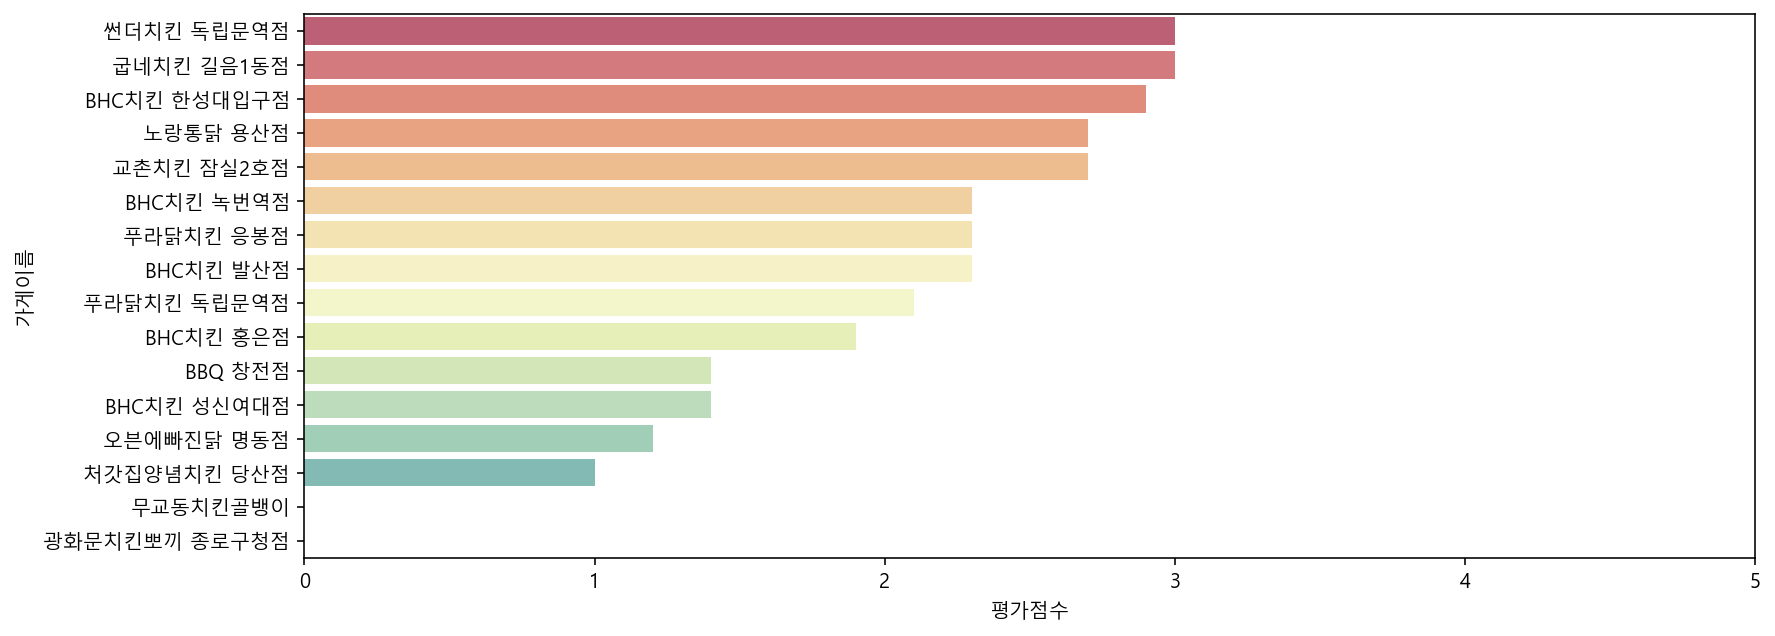

In [14]:
# sj1 이 평균보다 낮은곳
# sj가 평균보다 높은곳

import warnings
warnings.filterwarnings('ignore') #경고메시지가 뜹니다~

x1 = sj1['가게이름']
y1 = sj1['평가점수']

x = sj['가게이름']
y = sj['평가점수']

plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y1,x1,alpha=0.8,palette="Spectral")# 평균보다 낮은곳 기준3.17



<AxesSubplot:xlabel='평가점수', ylabel='가게이름'>

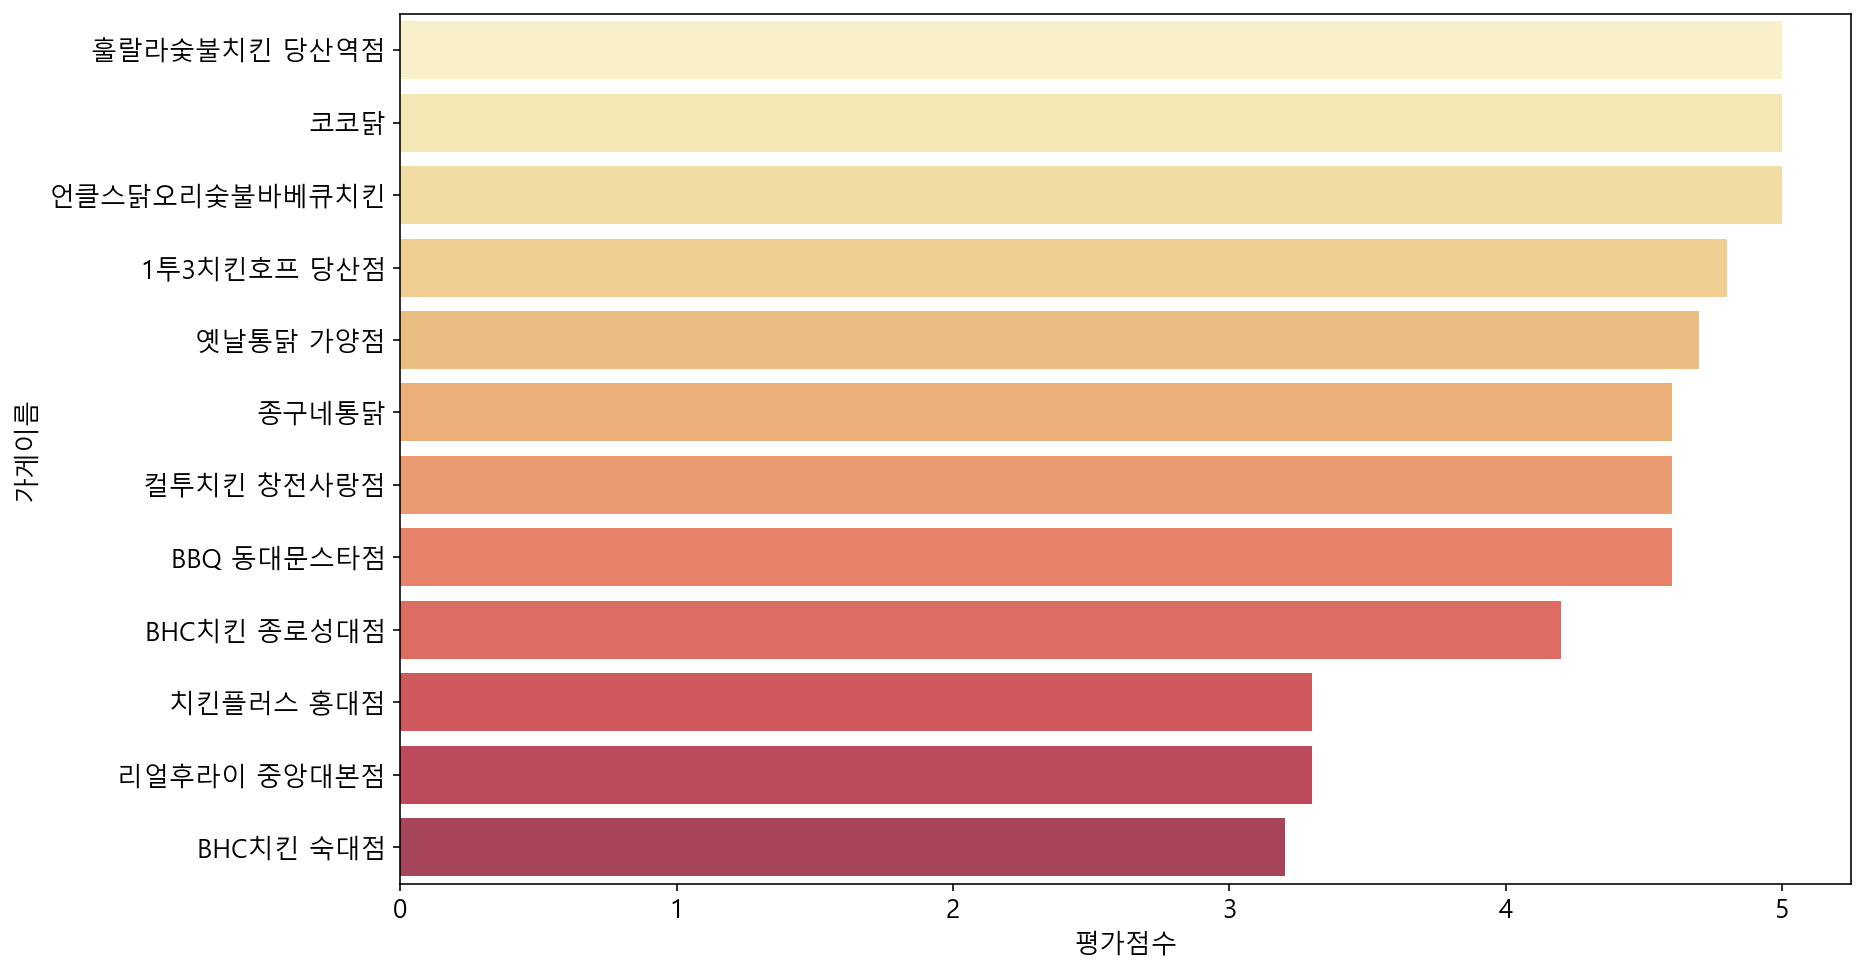

In [15]:
sns.barplot(y,x,alpha =0.8,palette='YlOrRd') #평가 점수보다 높은곳 기준3.17

<AxesSubplot:xlabel='평가인원', ylabel='가게이름'>

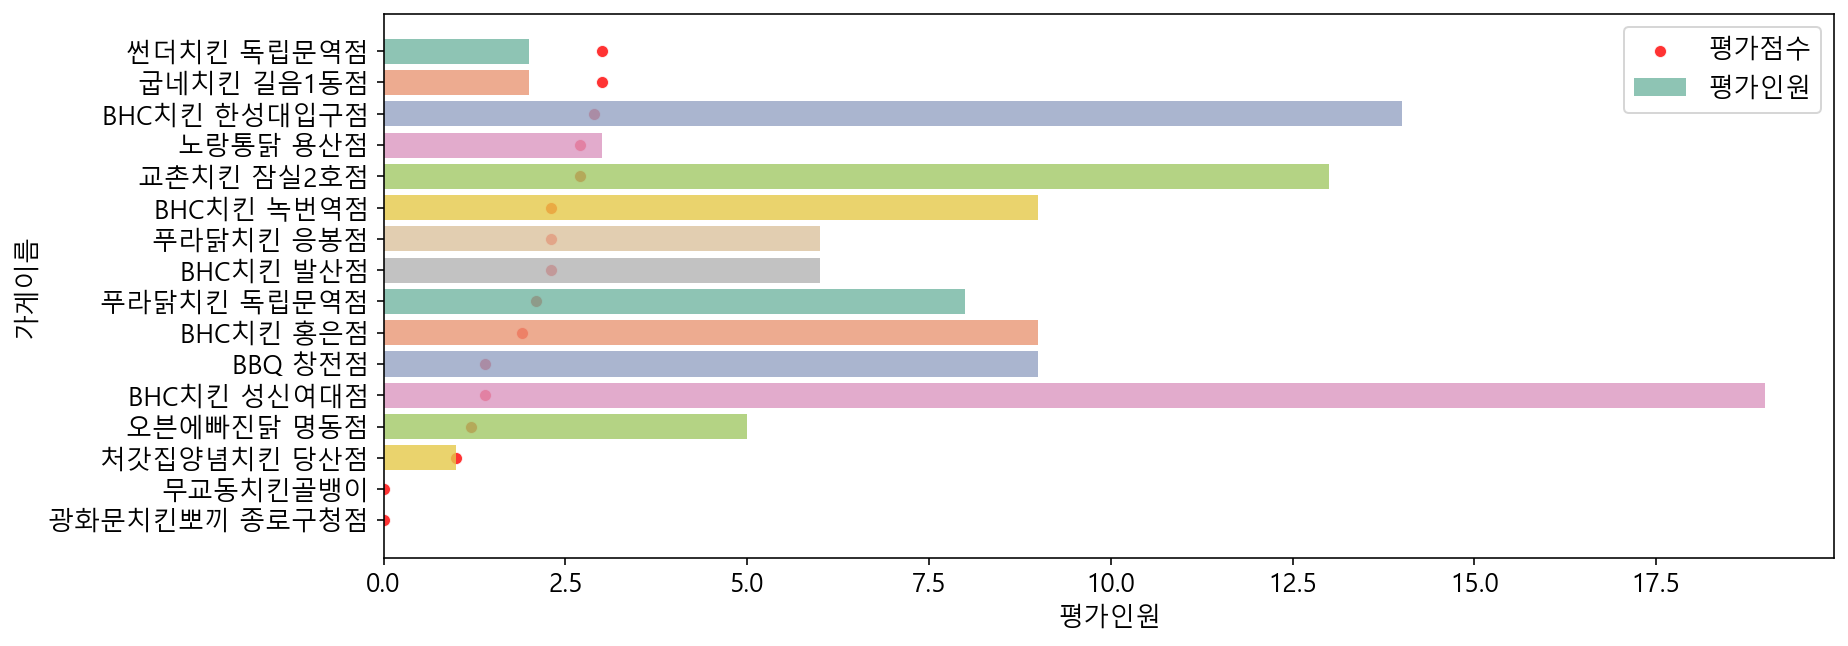

In [16]:
# sj1 이 평균보다 낮은곳
# sj가 평균보다 높은곳

import warnings
warnings.filterwarnings('ignore') #경고메시지가 뜹니다~

x1 = sj1['가게이름']
y1 = sj1['평가인원']

y2= sj1['평가점수']
plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
#plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y1,x1,alpha=0.8,palette="Set2",label='평가인원')# 평균보다 낮은곳 기준3.17

sns.scatterplot(y2,x1,alpha=0.8,color="Red",label='평가점수') # 평가에 참여한 인원


<AxesSubplot:xlabel='평가인원', ylabel='가게이름'>

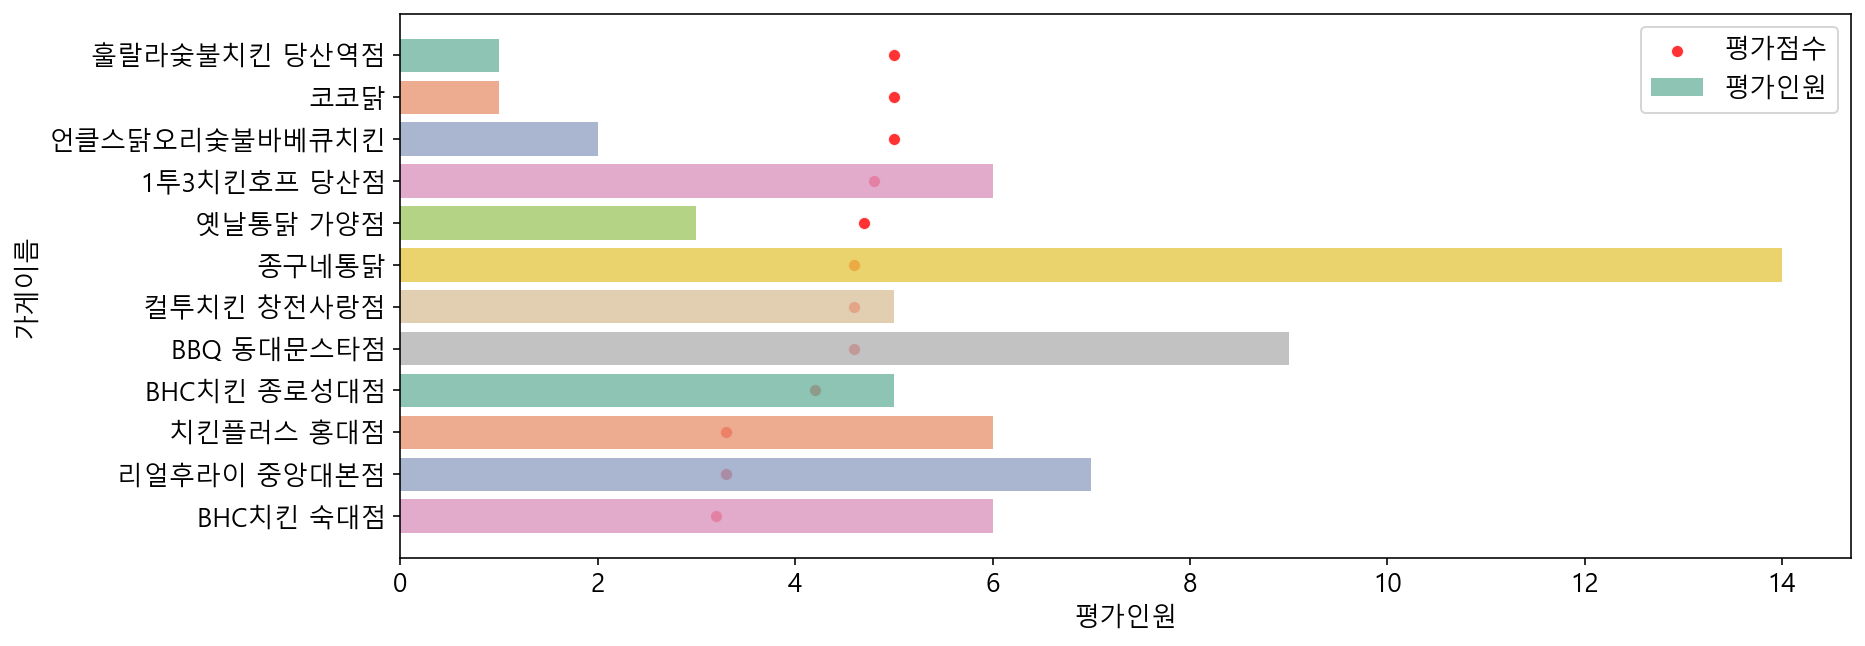

In [17]:
x = sj['가게이름']
y = sj['평가인원']

y3= sj['평가점수']

plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
#plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y,x,alpha=0.8,palette="Set2",label='평가인원')# 평균보다 낮은곳 기준3.17

sns.scatterplot(y3,x,alpha=0.8,color="Red",label='평가점수') # 평가에 참여한 인원


<AxesSubplot:title={'center':'평점과 평가인원 상관성 확인'}, xlabel='평가인원', ylabel='평가점수'>

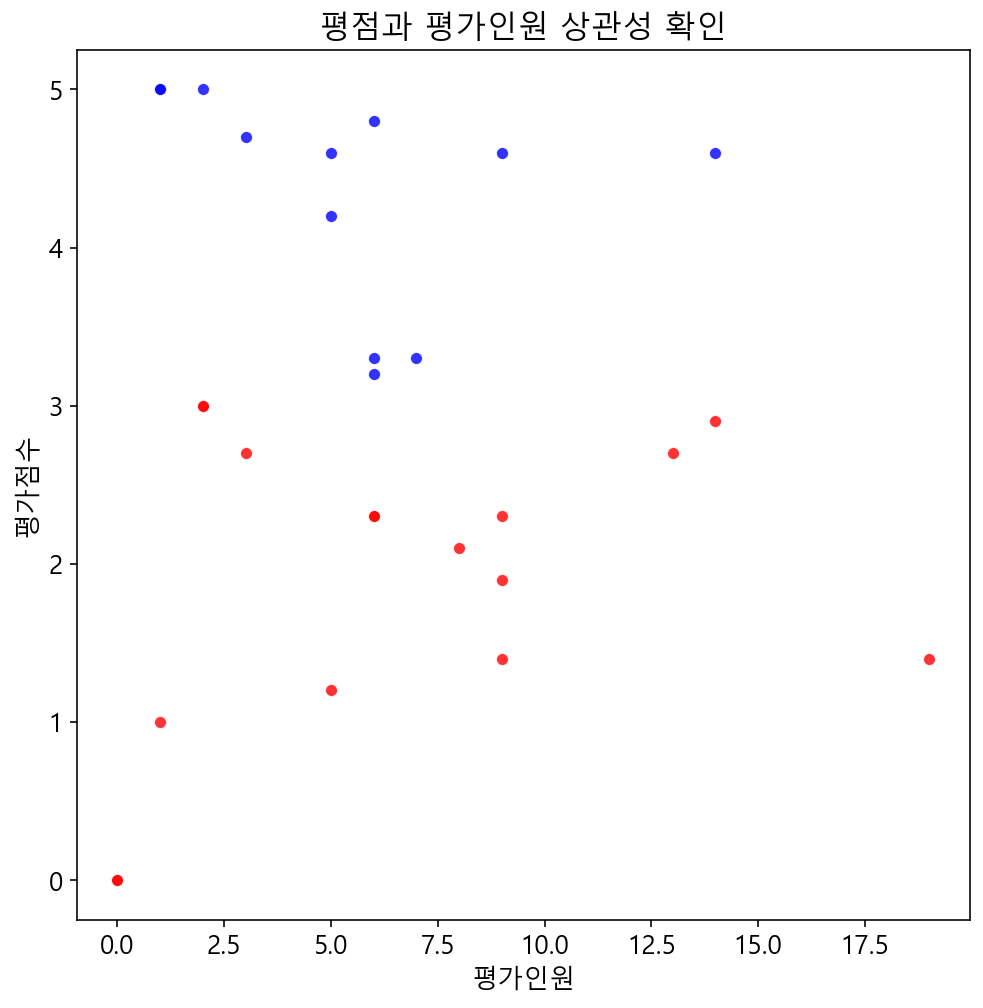

In [18]:
# 평가 점수와 평가 인원의 상관관계

x1 = sj['평가점수']
y1 = sj['평가인원']

x2 = sj1['평가점수']
y2 = sj1['평가인원']

plt.figure(figsize=(8, 8)) 
plt.rcParams['font.size'] = 13 # font 크기 조절 
plt.title('평점과 평가인원 상관성 확인')
sns.scatterplot(y1,x1,alpha=0.8,color="blue") # 평가에 참여한 인원
sns.scatterplot(y2,x2,alpha=0.8,color="Red") # 평가에 참여한 인원

<AxesSubplot:title={'center':'평점과 평가인원 상관성 확인'}, xlabel='평가인원', ylabel='리뷰갯수'>

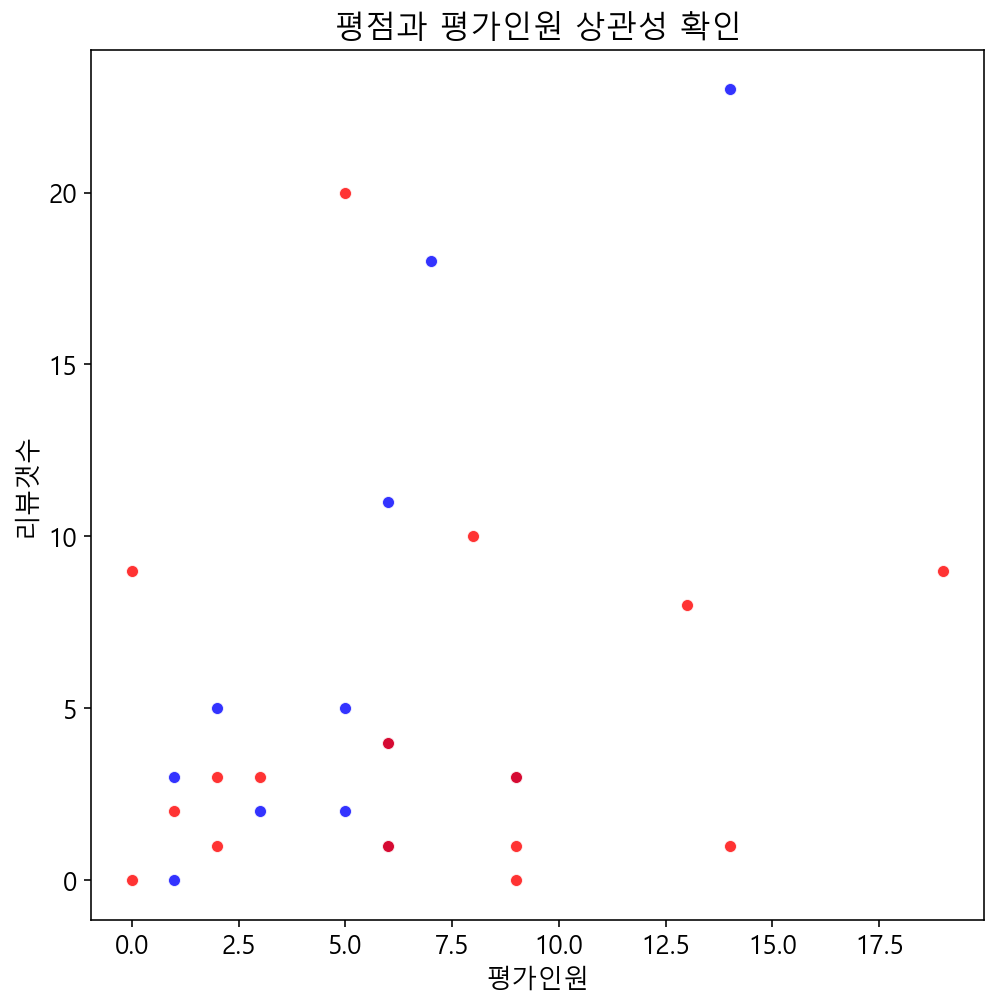

In [19]:
# 리뷰 갯수와 평가 인원의 상관관계

x1 = sj['리뷰갯수']
y1 = sj['평가인원']

x2 = sj1['리뷰갯수']
y2 = sj1['평가인원']

plt.figure(figsize=(8, 8)) 
plt.rcParams['font.size'] = 13 # font 크기 조절 
plt.title('평점과 평가인원 상관성 확인')
sns.scatterplot(y1,x1,alpha=0.8,color="blue") # 평가에 참여한 인원
sns.scatterplot(y2,x2,alpha=0.8,color="Red") # 평가에 참여한 인원

In [20]:
ss = sel['업종']=='치킨'
sk = sel[ss]
sel_co = sk[['가게이름','평가점수','평가인원','리뷰갯수']]
sel_co.head(3)

,가게이름,평가점수,평가인원,리뷰갯수
22,BHC치킨 녹번역점,2.3,9,1
32,훌랄라숯불치킨 당산역점,5.0,1,0
45,BBQ 창전점,1.4,9,3


In [21]:
# 상관관계 분석
# 1에 가까울 수록 관계가 깊으며 0에 가까울 수록 관계가 적다. 
import numpy as np

In [22]:
sel_corr = sel_co.corr()
sel_corr = sel_corr.apply(lambda x : round(x, 3))
sel_corr

,평가점수,평가인원,리뷰갯수
평가점수,1.000,-0.025,-0.033
평가인원,-0.025,1.000,0.320
리뷰갯수,-0.033,0.320,1.000


In [23]:
# heatmap으로 표시

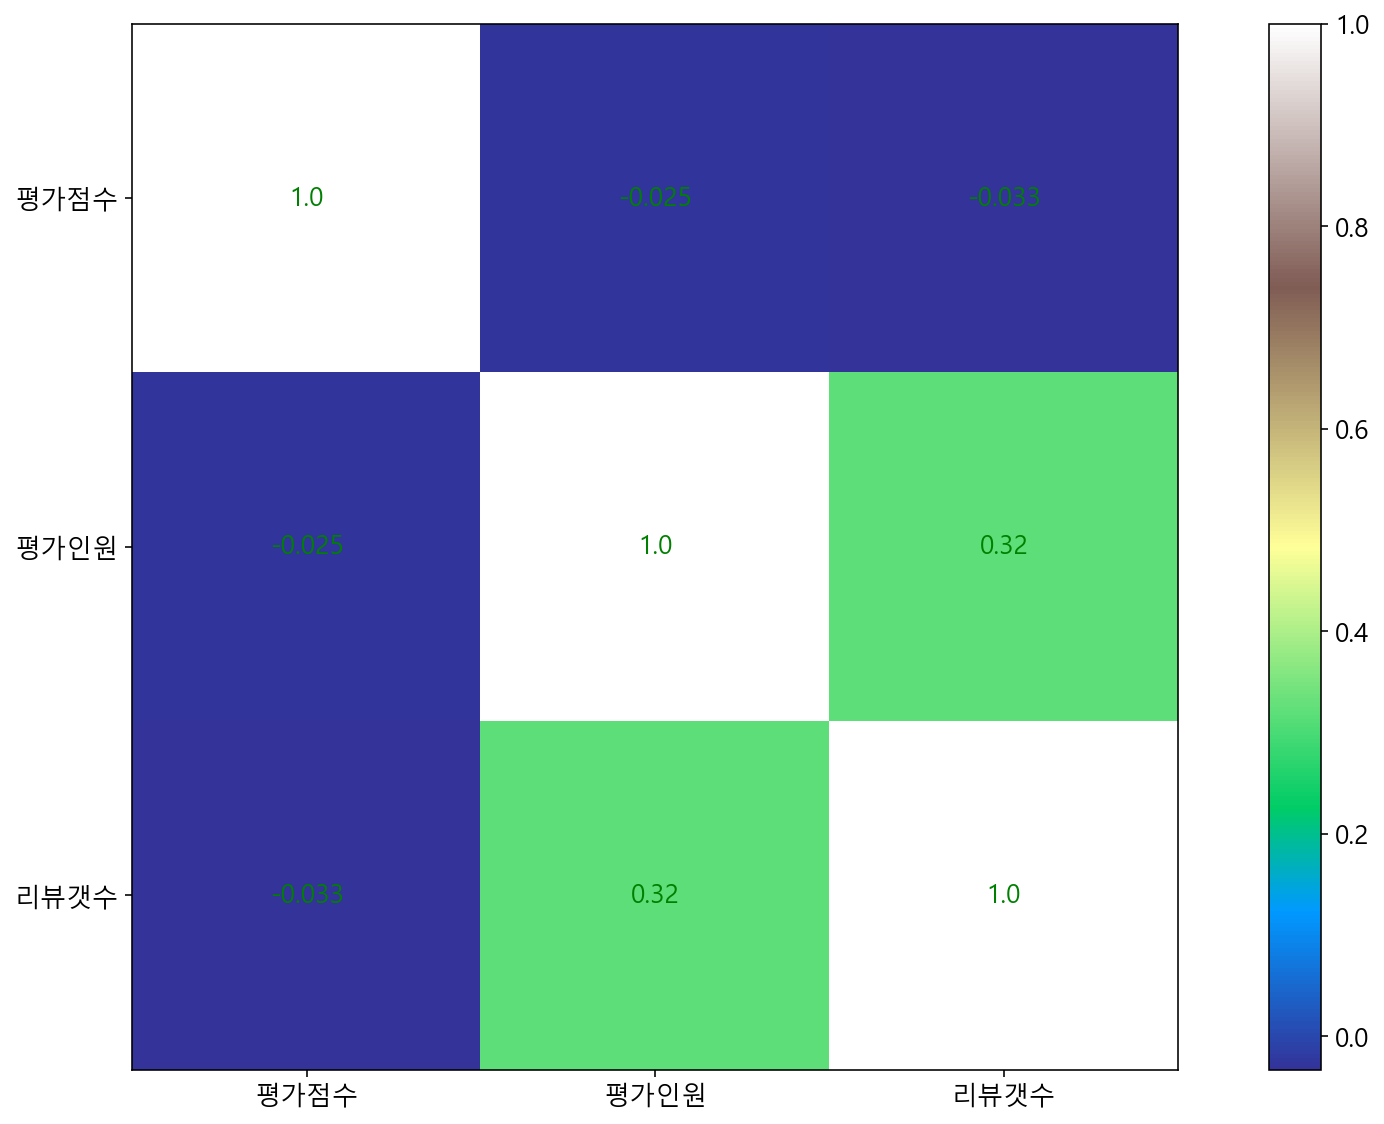

In [24]:
# 평점에 관계 없이 전체
fig, ax = plt.subplots()
im = ax.imshow(sel_corr, cmap='terrain')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(sel_corr.columns)))
ax.set_yticks(np.arange(len(sel_corr.index)))

ax.set_xticklabels(sel_corr.columns)
ax.set_yticklabels(sel_corr.columns)

for x in range(len(sel_corr.columns)):
    for y in range(len(sel_corr.index)):
        ax.text(y, x, sel_corr.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

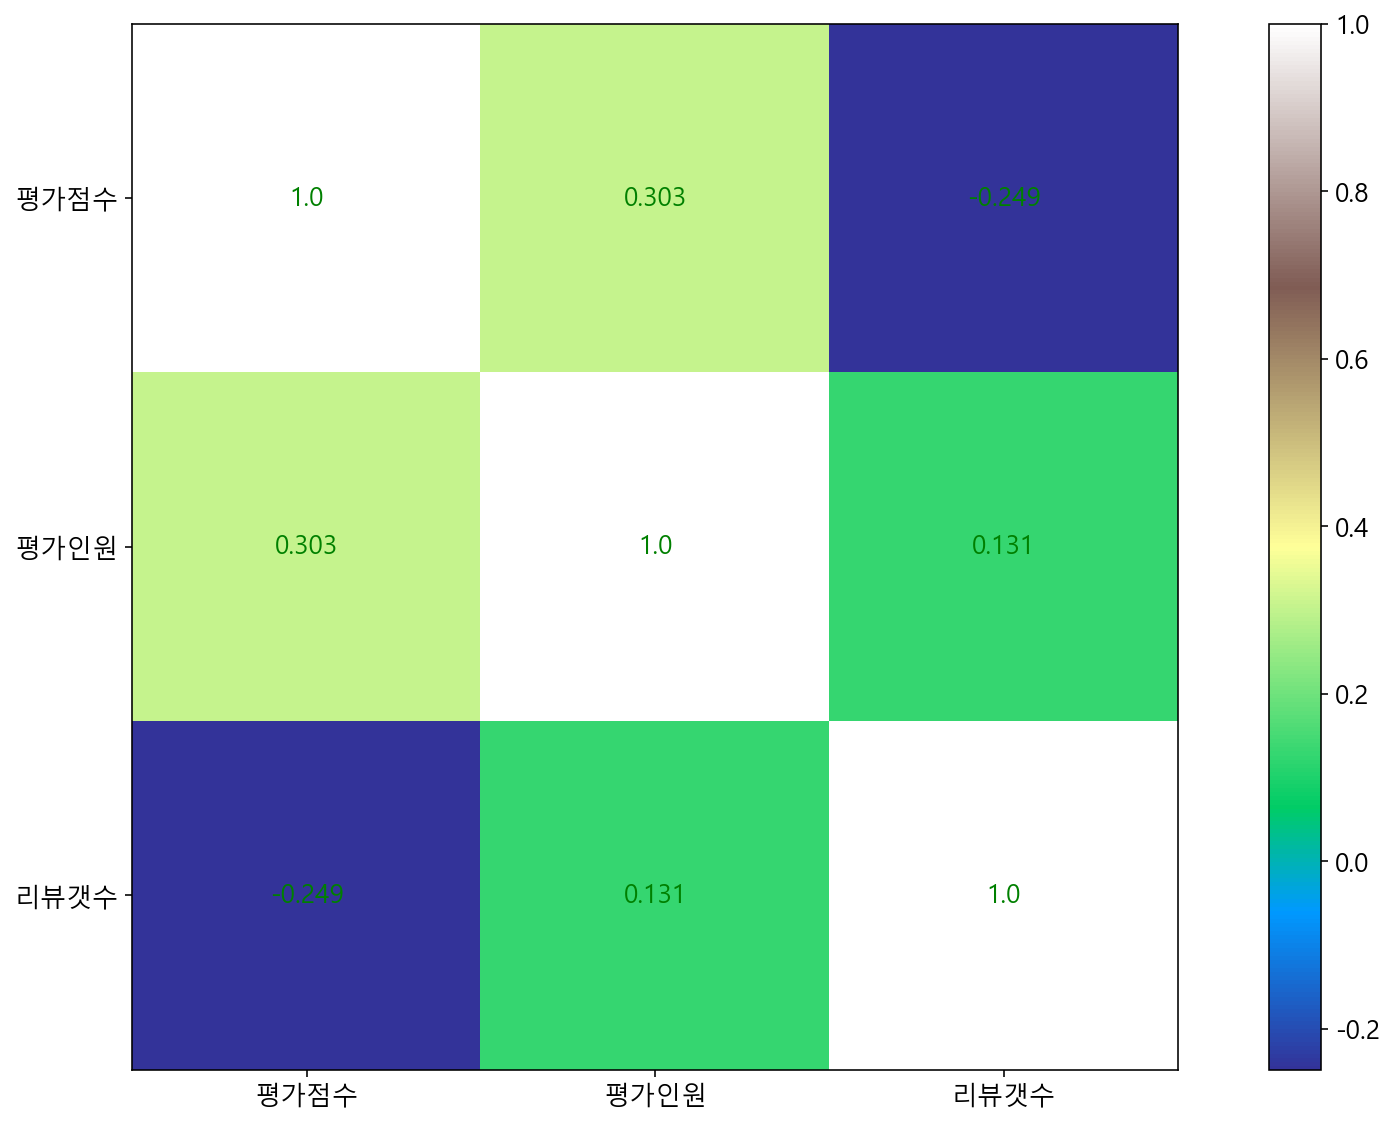

In [25]:
# 평점이 낮은 매장의 평가점수, 평가인원, 리뷰갯수의 상관관계
sh = (sel['평가점수']<=3.17)&(sel['업종']=='치킨')
shk = sel[sh]
selh_co = shk[['가게이름','평가점수','평가인원','리뷰갯수']]
selh_co.head(3)

sel_corr = selh_co.corr()
sel_corr = sel_corr.apply(lambda x : round(x, 3))

fig, ax = plt.subplots()
im = ax.imshow(sel_corr, cmap='terrain')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(sel_corr.columns)))
ax.set_yticks(np.arange(len(sel_corr.index)))

ax.set_xticklabels(sel_corr.columns)
ax.set_yticklabels(sel_corr.columns)

for x in range(len(sel_corr.columns)):
    for y in range(len(sel_corr.index)):
        ax.text(y, x, sel_corr.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

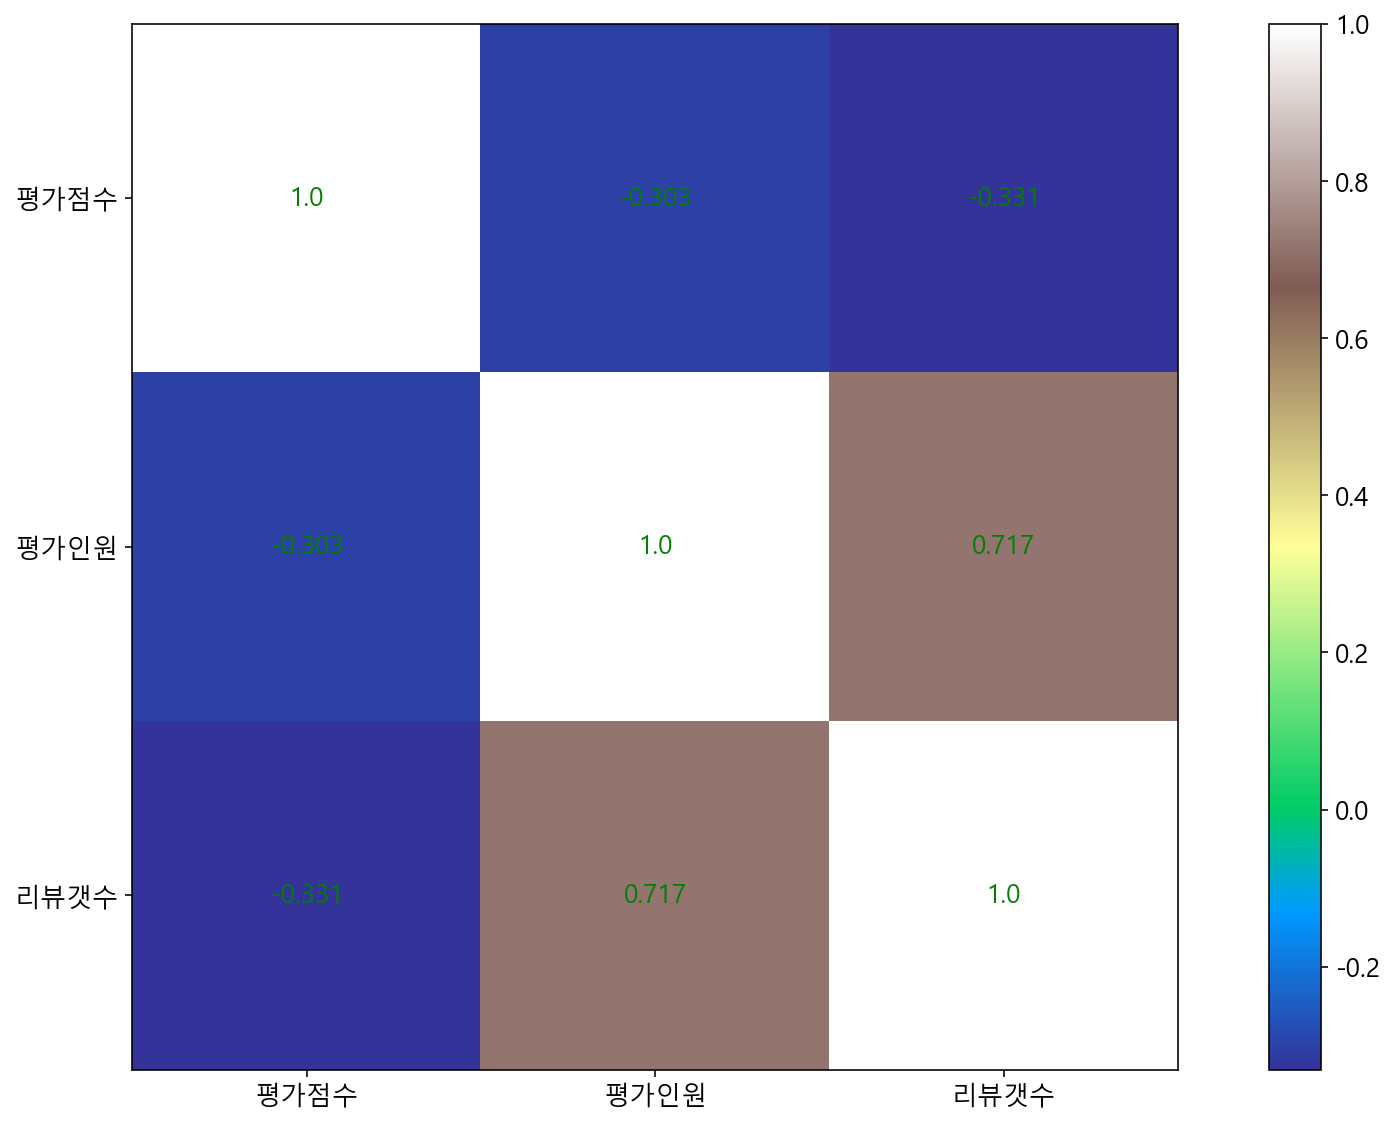

In [26]:
# 평점이 높은 매장의 평가점수, 평가인원, 리뷰갯수의 상관관계
sh = (sel['평가점수']>=3.17)&(sel['업종']=='치킨')
shk = sel[sh]
selh_co = shk[['가게이름','평가점수','평가인원','리뷰갯수']]
selh_co.head(3)

sel_corr = selh_co.corr()
sel_corr = sel_corr.apply(lambda x : round(x, 3))

fig, ax = plt.subplots()
im = ax.imshow(sel_corr, cmap='terrain')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(sel_corr.columns)))
ax.set_yticks(np.arange(len(sel_corr.index)))

ax.set_xticklabels(sel_corr.columns)
ax.set_yticklabels(sel_corr.columns)

for x in range(len(sel_corr.columns)):
    for y in range(len(sel_corr.index)):
        ax.text(y, x, sel_corr.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

In [ ]:
# 평점에 관계 없이 평가점수, 평가인원, 리뷰갯수의 상관관계를 확인 했을때 명확한 상관성을 확인 할 수 없으나.
# 평점별 구분해서 진행 하면
# 낮은 평점에서 평가인원과 리뷰갯수에는 0.717로 양의 상관관계가 있고
#        이때 평가인원과 평가점수에는 -0.331로 음의 상관관계가 있어.
# 업체에 대한 나쁜 결과에 대해서 리뷰하는 경향이 큰 것으로 판단됨.